In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

使用`density`参数，设置是否将所有bin的面积和标准化到1

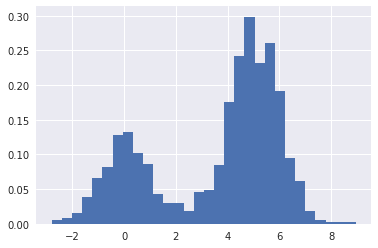

In [4]:
hist = plt.hist(x, bins=30, density=True)

hist函数可以返回三个量：
- density: 一个数组，依次包含每个bin的概率
- bins: bin的个数
- patch

In [5]:
density, bins, patches = hist
bins

array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
       -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
        1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
        3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
        5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
        6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
        8.9586027 ])

In [9]:
density

array([ 0.00510565,  0.00765847,  0.01531695,  0.03829237,  0.06637345,
        0.08169039,  0.12764124,  0.13274689,  0.10211299,  0.08679604,
        0.04339802,  0.0306339 ,  0.0306339 ,  0.01786977,  0.04595085,
        0.04850367,  0.08424322,  0.17614491,  0.24251836,  0.2986805 ,
        0.23230706,  0.26038813,  0.19146186,  0.09445452,  0.0612678 ,
        0.01786977,  0.00510565,  0.00255282,  0.00255282,  0.00255282])

In [13]:
patches

<a list of 30 Patch objects>

In [6]:
widths = bins[1:] - bins[:-1]
widths

array([ 0.39172292,  0.39172292,  0.39172292,  0.39172292,  0.39172292,
        0.39172292,  0.39172292,  0.39172292,  0.39172292,  0.39172292,
        0.39172292,  0.39172292,  0.39172292,  0.39172292,  0.39172292,
        0.39172292,  0.39172292,  0.39172292,  0.39172292,  0.39172292,
        0.39172292,  0.39172292,  0.39172292,  0.39172292,  0.39172292,
        0.39172292,  0.39172292,  0.39172292,  0.39172292,  0.39172292])

In [7]:
(density * widths).sum()  # 概率密度 x 30个固定宽度的区间，得到概率密度下的面积

1.0

In [8]:
hist

(array([ 0.00510565,  0.00765847,  0.01531695,  0.03829237,  0.06637345,
         0.08169039,  0.12764124,  0.13274689,  0.10211299,  0.08679604,
         0.04339802,  0.0306339 ,  0.0306339 ,  0.01786977,  0.04595085,
         0.04850367,  0.08424322,  0.17614491,  0.24251836,  0.2986805 ,
         0.23230706,  0.26038813,  0.19146186,  0.09445452,  0.0612678 ,
         0.01786977,  0.00510565,  0.00255282,  0.00255282,  0.00255282]),
 array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
        -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
         1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
         3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
         5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
         6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
         8.9586027 ]),
 <a list of 30 Patch objects>)

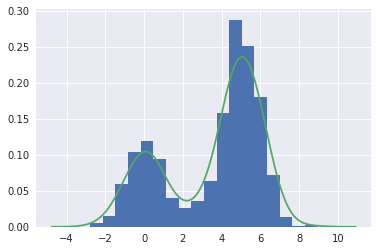

In [25]:
plt.hist(x, bins=18, density=True)
sns.kdeplot(x) # 画出拟合的概率密度函数图像

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


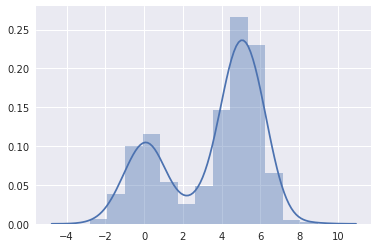

In [22]:
sns.distplot(x)

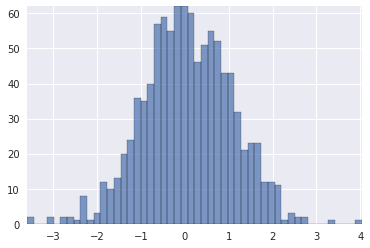

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

fig, ax = plt.subplots()

# Fixing random state for reproducibility
np.random.seed(19680801)


# histogram our data with numpy

data = np.random.randn(1000)
n, bins = np.histogram(data, 50)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
# https://matplotlib.org/api/_as_gen/matplotlib.patches.Patch.html
patch = patches.PathPatch(barpath, alpha=0.7)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()